<a href="https://www.kaggle.com/code/rajatraj0502/superstore-dataset?scriptVersionId=137791307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
# Load the dataset with 'ISO-8859-1' encoding
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Get descriptive statistics
descriptive_stats = df.describe(include='all')

missing_values, duplicate_rows, descriptive_stats


(Row ID           0
 Order ID         0
 Order Date       0
 Ship Date        0
 Ship Mode        0
 Customer ID      0
 Customer Name    0
 Segment          0
 Country          0
 City             0
 State            0
 Postal Code      0
 Region           0
 Product ID       0
 Category         0
 Sub-Category     0
 Product Name     0
 Sales            0
 Quantity         0
 Discount         0
 Profit           0
 dtype: int64,
 0,
              Row ID        Order ID Order Date   Ship Date       Ship Mode  \
 count   9994.000000            9994       9994        9994            9994   
 unique          NaN            5009       1237        1334               4   
 top             NaN  CA-2017-100111   9/5/2016  12/16/2015  Standard Class   
 freq            NaN              14         38          35            5968   
 mean    4997.500000             NaN        NaN         NaN             NaN   
 std     2885.163629             NaN        NaN         NaN             NaN   
 min    

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/2354268441.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_stats = df.groupby('Category')['Sales', 'Profit'].sum()
/tmp/ipykernel_20/2354268441.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subcategory_stats = df.groupby('Sub-Category')['Sales', 'Profit'].sum()
/tmp/ipykernel_20/2354268441.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_stats = df.groupby('Region')['Sales', 'Profit'].sum()


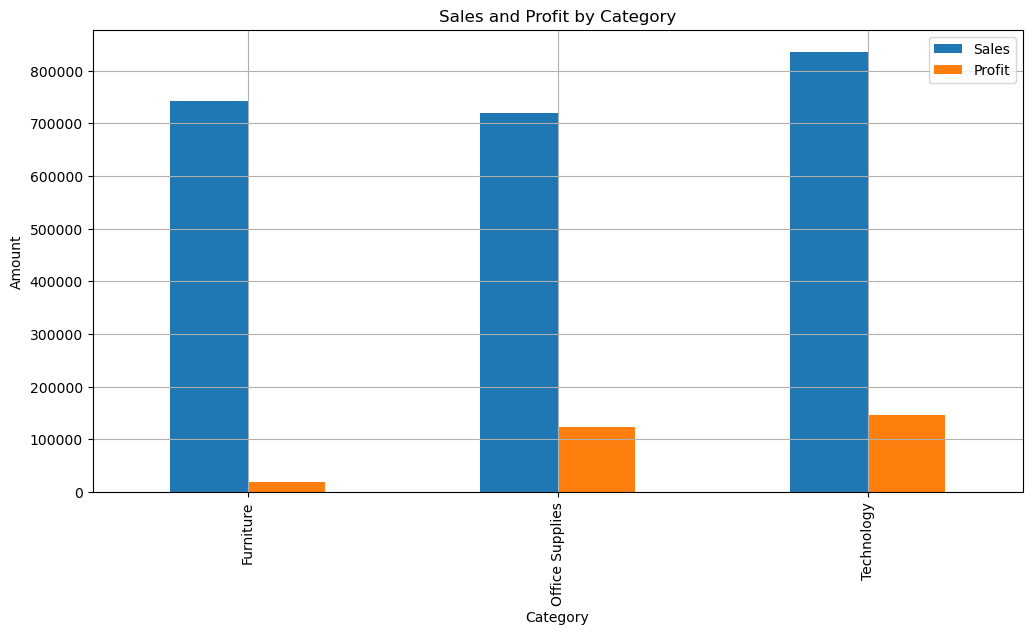

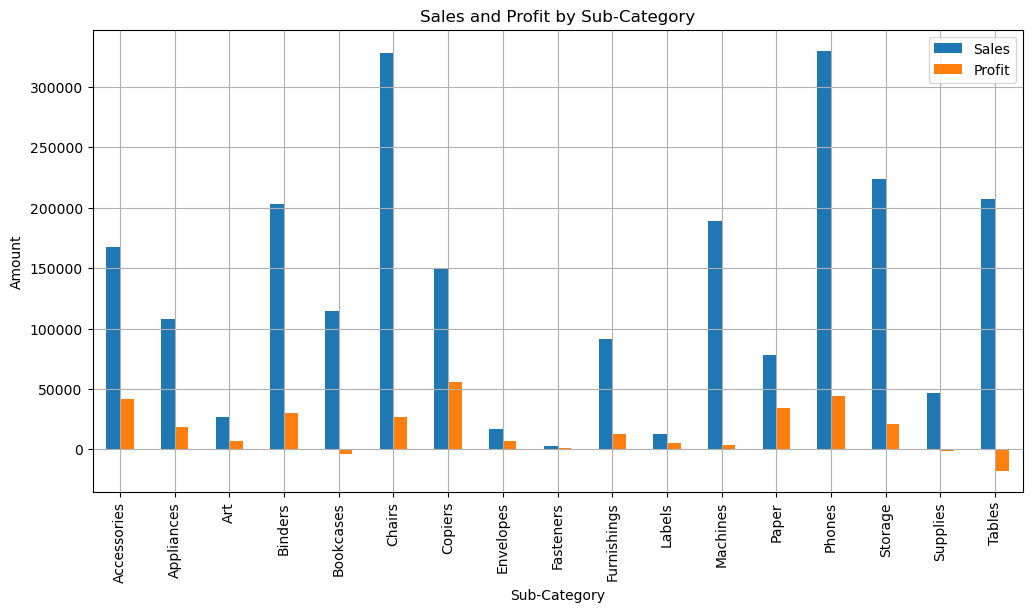

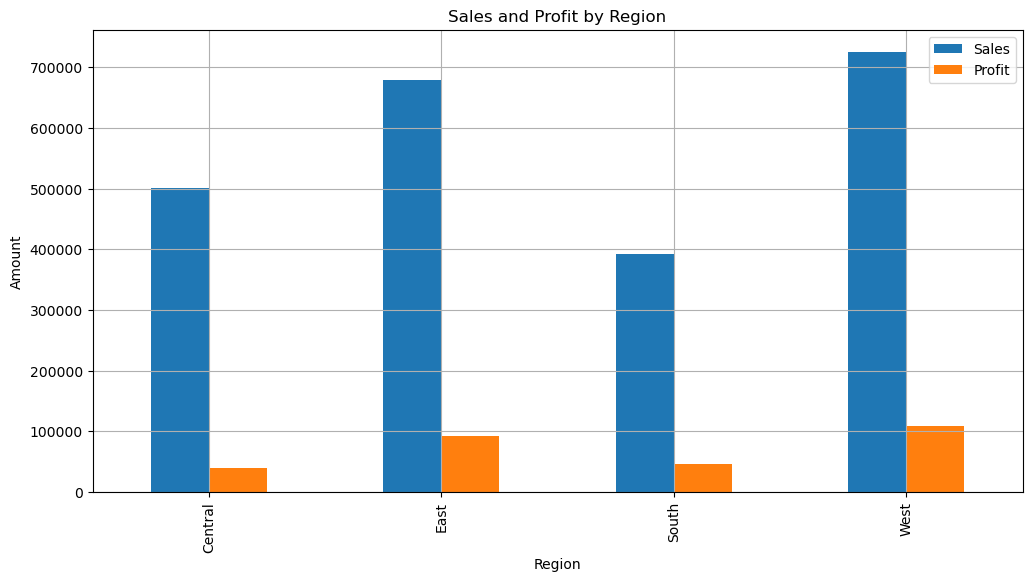

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales and profit by category
category_stats = df.groupby('Category')['Sales', 'Profit'].sum()

# Sales and profit by sub-category
subcategory_stats = df.groupby('Sub-Category')['Sales', 'Profit'].sum()

# Sales and profit by region
region_stats = df.groupby('Region')['Sales', 'Profit'].sum()

# Plot sales and profit by category
category_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Sales and Profit by Category')
plt.ylabel('Amount')
plt.grid()
plt.show()

# Plot sales and profit by sub-category
subcategory_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Sales and Profit by Sub-Category')
plt.ylabel('Amount')
plt.grid()
plt.show()

# Plot sales and profit by region
region_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.grid()
plt.show()


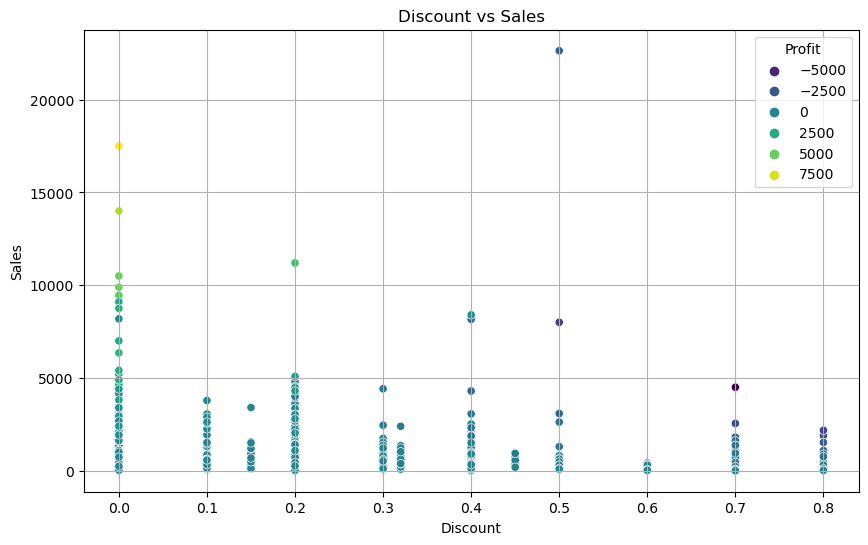

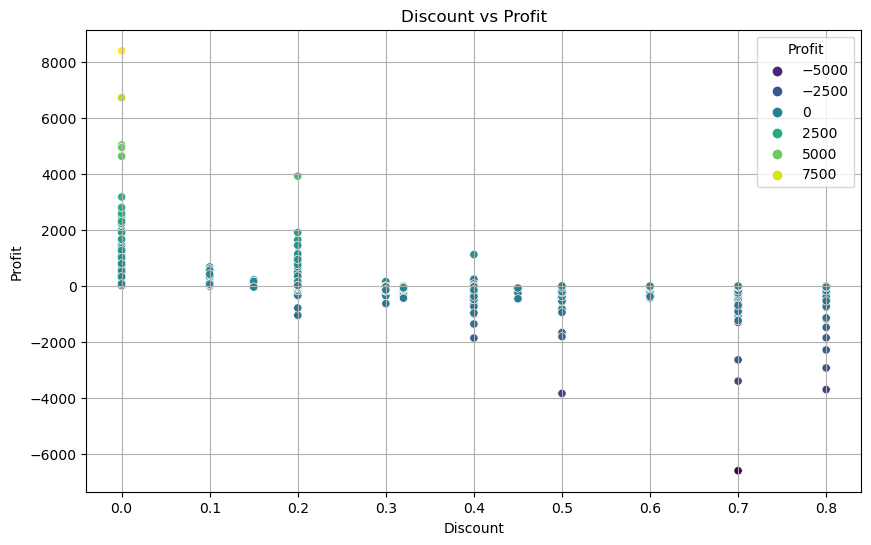

In [5]:
# Scatter plot of Discount vs Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Sales', hue='Profit', data=df, palette='viridis')
plt.title('Discount vs Sales')
plt.grid()
plt.show()

# Scatter plot of Discount vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', hue='Profit', data=df, palette='viridis')
plt.title('Discount vs Profit')
plt.grid()
plt.show()


In [6]:
# Top 10 products by sales
top_products_sales = df.groupby('Product Name')['Sales'].sum().nlargest(10)

# Top 10 products by profit
top_products_profit = df.groupby('Product Name')['Profit'].sum().nlargest(10)

top_products_sales, top_products_profit


(Product Name
 Canon imageCLASS 2200 Advanced Copier                                          61599.824
 Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
 Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
 HON 5400 Series Task Chairs for Big and Tall                                   21870.576
 GBC DocuBind TL300 Electric Binding System                                     19823.479
 GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
 Hewlett Packard LaserJet 3310 Copier                                           18839.686
 HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
 GBC DocuBind P400 Electric Binding System                                      17965.068
 High Speed Automatic Electric Letter Opener                                    17030.312
 Name: Sales, dtype: float64,
 Product Name
 Canon imageCLASS 2200 Advanced Copier    

/tmp/ipykernel_20/3757311941.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segment_stats = df.groupby('Segment')['Sales', 'Profit'].sum()


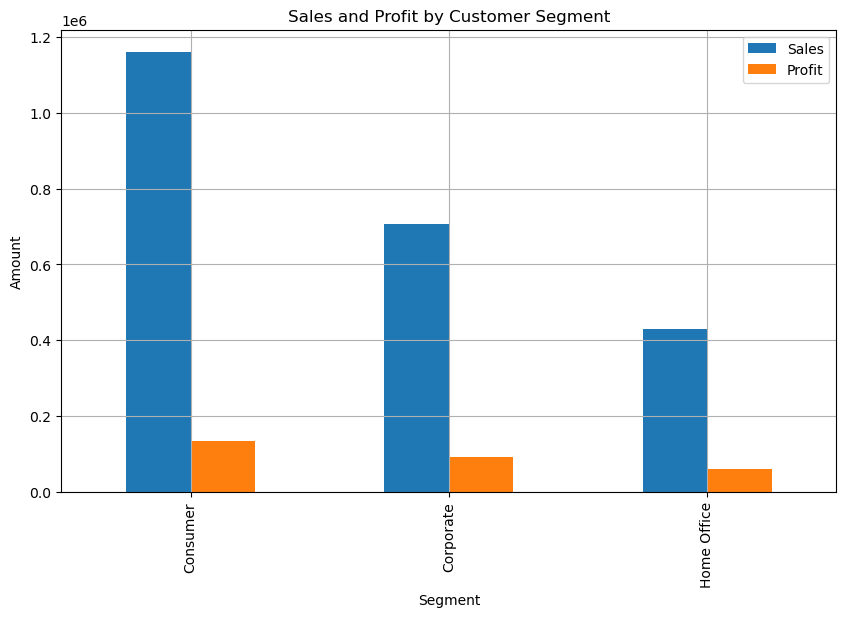

In [7]:
# Sales and profit by customer segment
segment_stats = df.groupby('Segment')['Sales', 'Profit'].sum()

# Plot sales and profit by customer segment
segment_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Sales and Profit by Customer Segment')
plt.ylabel('Amount')
plt.grid()
plt.show()


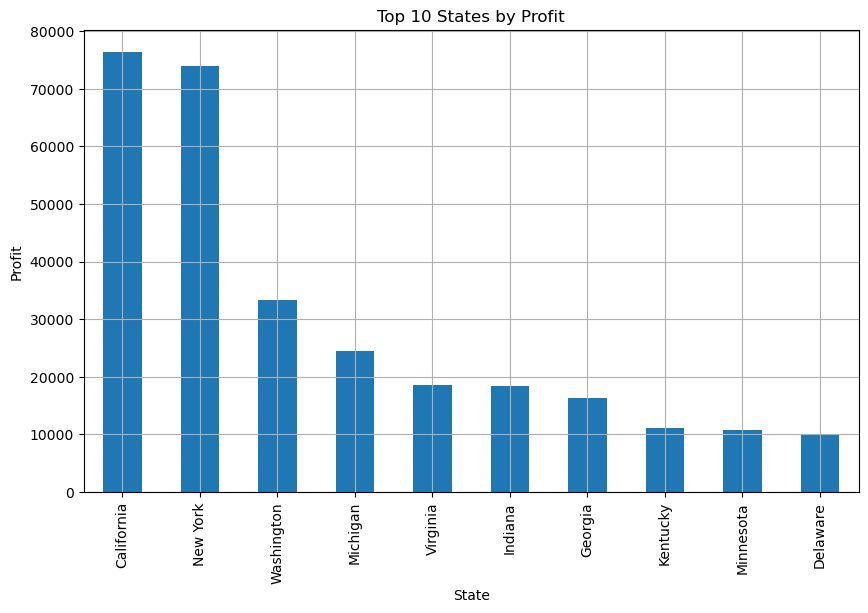

In [8]:
# Top 10 states by profit
top_states_profit = df.groupby('State')['Profit'].sum().nlargest(10)

# Plot top 10 states by profit
top_states_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 States by Profit')
plt.ylabel('Profit')
plt.grid()
plt.show()
